# KNN From Scratch

The purpose of this assignment is to develop a K nearest neighbors linear regression algorithm and test it on the familiar housing data that we have analyzed in other assignments (King county, Washington).

After development of our algorithm, we will train a model and use it to answer a few questions (tasks).

In [86]:
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np
import random
import math
%matplotlib inline

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float,
              'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float,
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [286]:
train_df=pd.read_csv("kc_house_data_small_train.csv",dtype=dtype_dict)
test_df=pd.read_csv("kc_house_data_small_test.csv",dtype=dtype_dict)
validation_df=pd.read_csv("kc_house_data_validation.csv",dtype=dtype_dict)

In [287]:
feature_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',    'yr_built', 'yr_renovated',
                'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [288]:
def normalize_features(feature_df):
    output_df=pd.DataFrame()
    norm_list=[]
    for column in feature_df.columns:
        norm=math.sqrt((feature_df[column]*feature_df[column]).sum())
        normalized_series=feature_df[column]/norm
        output_df[column]=normalized_series
        norm_list.append(norm)
    return (output_df,norm_list)

In [289]:
def rss(ytrue,ypredict):
    return ((ytrue-ypredict)**2).sum()

In [292]:
#The knn_single() function takes as inputs: (1) a feature dataframe, where the columns are (normalized) features, and the rows
#are data points; and (2) a "query data point" that is in the form of a series, where the elements represent the feature value
#of a single data point, and they are in the same order as the features in the feature matrix; and a k value.
#The function converts the series to a dataframe where the columns represent the features (similar to the feature dataframe),
#and each row is a replica of the single query data point. Thus, the query dataframe will have the same value for every row 
#in a particular column. 
#The feature dataframe is a feature dataframe of N datapoints, whereas, the query dataframe is a feature dataframe of the
#same data point repeated n times.
#Then we do matrix arithmatic on the data frames. We first subtract the dataframes, then square them, then sum by rows,
#to get a series of the sum of square differences. Then we take the square root. The result is a series of euclidian distances
#from the query point to all other data points.

#We then sort the distances and return the top k entries

def knn_single(query_series,train_features,k):
    query_dict={}
    column_list=list(train_features.columns)
    for i in range(len(column_list)):
        query_dict[column_list[i]]=[query_series[i],]*len(train_features)
    query_df=pd.DataFrame(query_dict,index=list(train_features.index))
    query_df=query_df[column_list]
    distances=np.sqrt(((train_features-query_df)**2).sum(axis=1))
    distances.sort_values(inplace=True)
    return distances[:k]

In [293]:
def knn_predict(x_test_df,y_train,train_features,k):
    outputlist=[]
    for item in x_test_df.iterrows():
        output_series=knn_single(item[1],train_features,k)
        sumsofar=0
        for index in list(output_series.index):
            sumsofar+=y_train[index]
        yav=sumsofar/len(output_series.index)
        outputlist.append(yav)
    return outputlist

## Test

Let's test our function

In [294]:
#Create a random set of n x-values in the range [0,1)
random.seed(98103)
n=30
x=[random.random() for i in range(n)]

In [295]:
x.sort()
xseries=pd.Series(x)

In [296]:
#Create y values
yseries=xseries.apply(lambda x: math.sin(4*x))

In [297]:
#Add some random Guasian noise to the data
random.seed(1)
noise=pd.Series([random.gauss(0,1.0/3.0) for i in range(n)])
yseries=yseries+noise

In [298]:
x_train_df=pd.DataFrame({"x":xseries})

In [299]:
xtest=[random.random() for i in range(n)]

In [300]:
xtest.sort()
xtestseries=pd.Series(x)

In [301]:
xtestdf=pd.DataFrame({"x":xtestseries})

In [302]:
y_predict=knn_predict(xtestdf,yseries,x_train_df,2)

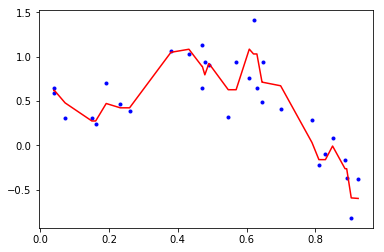

In [303]:
plt.figure()
plt.plot(xseries,yseries,".",color="blue")
plt.plot(xseries,y_predict,"-",color="red")

Looks good.

## Normalize the Training Data

In [304]:
#Create feature dataframe with all features in feature_list plus a row called "intercept" that contains all ones.
#First we extract the features from the train_df...
train_feature_df=train_df[feature_list]

In [305]:
#Then we add a column of ones
train_feature_df["intercept"]=1

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [306]:
#Make sure columns are in correct order
train_feature_df=train_feature_df[["intercept",]+feature_list]

In [307]:
#Return a normalized dataset and a list of the norms
dfandNorms=normalize_features(train_feature_df)

In [308]:
normalized_train_df=dfandNorms[0]
norms=dfandNorms[1]

In [309]:
normalized_train_df.head()

,intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.013451,0.011635,0.006025,0.007037,0.007337,0.008530,0.0,0.0,0.011632,0.012167,0.008117,0.000000,0.013339,0.000000,0.013437,-0.013456,0.008616,0.002292
1,0.013451,0.011635,0.013556,0.015326,0.009404,0.017059,0.0,0.0,0.011632,0.012167,0.014928,0.010234,0.013312,0.066508,0.013496,-0.013463,0.010866,0.003099
2,0.013451,0.007756,0.006025,0.004592,0.012985,0.008530,0.0,0.0,0.011632,0.010429,0.005297,0.000000,0.013189,0.000000,0.013501,-0.013454,0.017488,0.003270
3,0.013451,0.015513,0.018075,0.011688,0.006493,0.008530,0.0,0.0,0.019387,0.012167,0.007223,0.023282,0.013408,0.000000,0.013440,-0.013471,0.008744,0.002028
4,0.013451,0.011635,0.012050,0.010019,0.010492,0.008530,0.0,0.0,0.011632,0.013905,0.011557,0.000000,0.013558,0.000000,0.013467,-0.013433,0.011573,0.003043


## Normalize the Test Data

In [315]:
normalized_test_df=test_df[feature_list]
normalized_test_df["intercept"]=1
normalized_test_df=normalized_test_df[["intercept",]+feature_list]

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [316]:
for i in range(len(norms)):
    normalized_test_df[normalized_test_df.columns[i]]=normalized_test_df[normalized_test_df.columns[i]]/norms[i]

In [317]:
normalized_test_df.head()

,intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.013451,0.015513,0.018075,0.017592,0.006493,0.017059,0.0,0.051024,0.011632,0.015644,0.013621,0.024817,0.013503,0.0,0.013454,-0.013469,0.013759,0.001623
1,0.013451,0.015513,0.006025,0.009541,0.005584,0.012794,0.0,0.000000,0.015509,0.012167,0.011007,0.000000,0.013073,0.0,0.013480,-0.013466,0.010352,0.001744
2,0.013451,0.011635,0.010544,0.009064,0.008285,0.008530,0.0,0.000000,0.011632,0.012167,0.005435,0.018677,0.013292,0.0,0.013489,-0.013461,0.009773,0.002529
3,0.013451,0.011635,0.006025,0.006500,0.003896,0.012794,0.0,0.000000,0.015509,0.013905,0.007498,0.000000,0.013162,0.0,0.013487,-0.013469,0.010094,0.002061
4,0.013451,0.015513,0.015062,0.013656,0.017421,0.017059,0.0,0.000000,0.015509,0.015644,0.015753,0.000000,0.013517,0.0,0.013467,-0.013445,0.017231,0.005551


## Normalize the Validation Set

In [318]:
normalized_valid_df=validation_df[feature_list]
normalized_valid_df["intercept"]=1
normalized_valid_df=normalized_valid_df[["intercept",]+feature_list]

C:\Users\Mike\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [319]:
for i in range(len(norms)):
    normalized_valid_df[normalized_valid_df.columns[i]]=normalized_valid_df[normalized_valid_df.columns[i]]/norms[i]

In [320]:
normalized_valid_df.head()

,intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,0.013451,0.015513,0.010544,0.009661,0.006467,0.008530,0.0,0.0,0.015509,0.012167,0.005916,0.019444,0.013285,0.0,0.013491,-0.013465,0.009001,0.002020
1,0.013451,0.019391,0.015062,0.013537,0.008181,0.017059,0.0,0.0,0.011632,0.013905,0.015616,0.000000,0.013612,0.0,0.013385,-0.013447,0.014402,0.002841
2,0.013451,0.015513,0.010544,0.013895,0.006493,0.012794,0.0,0.0,0.015509,0.012167,0.010388,0.020979,0.013162,0.0,0.013485,-0.013468,0.009387,0.002028
3,0.013451,0.011635,0.006025,0.009363,0.002961,0.017059,0.0,0.0,0.011632,0.012167,0.010800,0.000000,0.013114,0.0,0.013474,-0.013468,0.010159,0.001071
4,0.013451,0.015513,0.018075,0.011032,0.012954,0.017059,0.0,0.0,0.011632,0.013905,0.012727,0.000000,0.013585,0.0,0.013435,-0.013444,0.014595,0.003465


## Define the Y Values That KNN Averages

For the knn regressor to predict y values of a query point, it must average the y values of the training set that are the k nearest neighbors to the query point. These y values, of comparison, will be the price values of the training set

In [327]:
y_compare=train_df.price

## Task 1

To start, let's just explore computing the “distance” between two given houses. We will take our query house to be the first house of the test set and look at the distance between this house and the 10th house of the training set.

In [313]:
normalized_train_df.iloc[9:10]

,intercept,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
9,0.013451,0.011635,0.006025,0.008349,0.002053,0.012794,0.0,0.0,0.019387,0.013905,0.009631,0.0,0.013025,0.0,0.013468,-0.013463,0.011959,0.001566


In [322]:
knn_single(normalized_test_df.iloc[0],normalized_train_df.iloc[9:10],1)

9    0.059878
dtype: float64

## Task 2

Among the first 10 training houses, which house is the closest to the query house?

In [323]:
knn_single(normalized_test_df.iloc[0],normalized_train_df.iloc[:10],1)

8    0.052464
dtype: float64

## Task 3

Take the query house to be third house of the test set. What is the index and predicted value of the house in the training set that is closest to this query house?

In [324]:
knn_single(normalized_test_df.iloc[2],normalized_train_df,1)

1149    0.003669
dtype: float64

In [328]:
y_compare[1149]

477000.0

In [346]:
y_compare[382]

249000.0

## Task 4

Take the query house to be third house of the test set. What are the indices of the 4 training houses closest to the query house?

In [326]:
knn_single(normalized_test_df.iloc[2],normalized_train_df,4)

1149    0.003669
382     0.003701
3142    0.003948
2024    0.004400
dtype: float64

## Task 5

Again taking the query house to be third house of the test set, predict the value of the query house using k-nearest neighbors with k=4 

In [331]:
knn_predict(normalized_test_df.iloc[2:3],y_compare,normalized_train_df,4)

[394000.0]

## Task 6

Make predictions for the first 10 houses in the test set, using k=10. What is the index of the house in this query set that has the lowest predicted value? What is the predicted value of this house?

In [332]:
#Predictions
first10predict=knn_predict(test_feature_df.iloc[:10],y_compare,normalized_train_df,10)
first10predict

[990300.0,
 586760.0,
 450550.0,
 493600.0,
 638395.0,
 666370.0,
 379339.5,
 511445.70000000001,
 524020.0,
 457235.0]

In [336]:
#Since we chose houses with index 0 through 9, the index of first10predict is the same as the index of the query points.
#(note that this would not be the case if we had chosen our query set to be any other subset of the test set)
first10predict.index(min(first10predict))

6

## Task 7

There remains a question of choosing the value of k to use in making predictions. Here, we use a validation set to choose this value. Write a loop that does the following:

For k in [1, 2, … 15]:

Make predictions for the VALIDATION data using the k-nearest neighbors from the TRAINING data. Compute the RSS on VALIDATION data

Report which k produced the lowest RSS on validation data.

What is the RSS on the TEST data using the value of k found above? To be clear, sum over all houses in the TEST set.

In [337]:
rss_and_k_list=[]
for k in range(1,16):
    y_predictions=knn_predict(normalized_valid_df,y_compare,normalized_train_df,k)
    RSS=rss(validation_df.price,y_predictions)
    rss_and_k_list.append((RSS,k))

In [339]:
rss_and_k_list.sort()

In [343]:
rss_and_k_list[0]

(73970240779400.08, 7)

We see that k=7 produced the lowest rss on the validation set. Let's compute the rss value for the predicted values of the test set using k=7

In [344]:
y_test_k7_predictions=knn_predict(normalized_test_df,y_compare,normalized_train_df,7)

In [345]:
rss(test_df.price,y_test_k7_predictions)

135101633497002.58